<a href="https://colab.research.google.com/github/ajayshgithub/Project-1/blob/main/Project_3_WeatherForecast_using_Time_Series_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Download data

We will use [weather data](https://www.bgc-jena.mpg.de/wetter/) provided by [Max Plank Institute for BiogeoChemistry](https://www.bgc-jena.mpg.de).

In [1]:
#Download the data
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip --quiet

In [2]:
!ls -l

total 13256
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
drwxr-xr-x 1 root root     4096 Sep  6 13:23 sample_data


In [3]:
#Unzip the file
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [4]:
!ls -l

total 55412
-rw-r--r-- 1 root root 43164220 Mar 19  2017 jena_climate_2009_2016.csv
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
drwxr-xr-x 1 root root     4096 Sep  6 13:23 sample_data


##Data Exploration

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
#Read Dataset
df = pd.read_csv('jena_climate_2009_2016.csv')

In [7]:
#Let's chcck the dataset contents
df.sample(n=5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
225759,16.04.2013 19:00:00,992.33,19.08,292.88,12.35,64.98,22.12,14.37,7.75,9.06,14.48,1176.42,0.74,1.40,144.50
103985,23.12.2010 03:20:00,974.81,0.06,275.22,-0.10,98.80,6.14,6.06,0.07,3.88,6.22,1239.96,0.55,1.16,61.81
29738,26.07.2009 12:30:00,995.47,20.03,293.57,7.68,44.78,23.46,10.51,12.96,6.59,10.55,1178.07,2.12,4.75,262.20
123920,10.05.2011 13:50:00,997.94,24.58,297.92,2.88,24.29,30.94,7.52,23.43,4.70,7.53,1164.29,2.37,3.92,206.30
412385,05.11.2016 07:10:00,977.22,6.40,281.41,3.68,82.70,9.62,7.96,1.66,5.08,8.14,1213.96,2.00,2.84,184.40


In [8]:
#No. of records
df.shape

(420551, 15)

In [9]:
#Columns
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [10]:
df.head(n=10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [11]:
#Checking null values
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

It's good that we didn't have any missing values in our dataset.


##DAta for Air Temperature

Excercise #1 : Build a model which will predict future 'Air Temperature' based on the past data.

In [12]:
#Get data for air temp.
temp_df = df['T (degC)']

In [13]:
#Make date time column as index to make sure data is sorted
temp_df.index = df['Date Time']

In [14]:
#Check data
temp_df.head(n=50)

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
01.01.2009 01:00:00   -8.05
01.01.2009 01:10:00   -7.62
01.01.2009 01:20:00   -7.62
01.01.2009 01:30:00   -7.91
01.01.2009 01:40:00   -8.43
01.01.2009 01:50:00   -8.76
01.01.2009 02:00:00   -8.88
01.01.2009 02:10:00   -8.85
01.01.2009 02:20:00   -8.83
01.01.2009 02:30:00   -8.66
01.01.2009 02:40:00   -8.66
01.01.2009 02:50:00   -8.70
01.01.2009 03:00:00   -8.81
01.01.2009 03:10:00   -8.84
01.01.2009 03:20:00   -8.94
01.01.2009 03:30:00   -8.94
01.01.2009 03:40:00   -8.86
01.01.2009 03:50:00   -8.99
01.01.2009 04:00:00   -9.05
01.01.2009 04:10:00   -9.23
01.01.2009 04:20:00   -9.49
01.01.2009 04:30:00   -9.50
01.01.2009 04:40:00   -9.35
01.01.2009 04:50:00   -9.47
01.01.2009 05:00:00   -9.63
01.01.2009 05:10:00   -9.67
01.01.2009 05:20:00   -9.68
01.01.2009 05:30:00   -9.90
01.01.2009 05:40:00   -9.91
01.01.2009 05:50:00   -9.51
01.01.2009

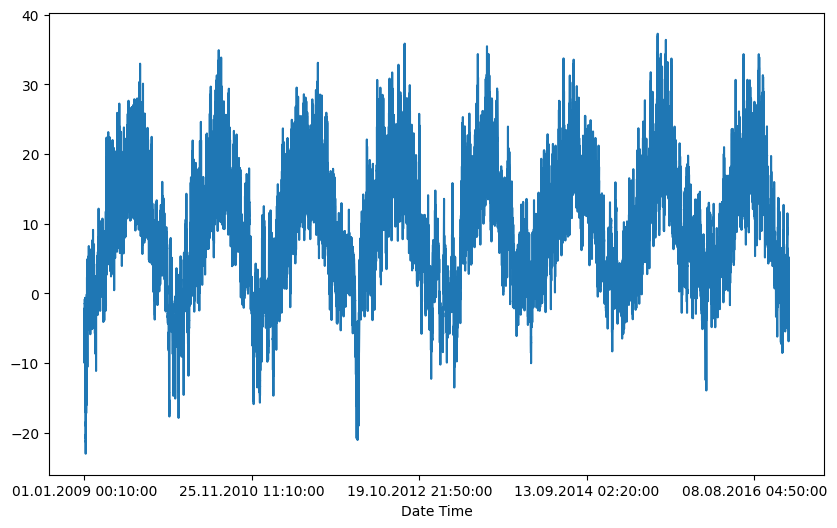

In [15]:
#Visualize data
temp_df.plot(subplots=True, figsize=(10,6))
plt.show()

##Data Preparation


Split data between training and Test

In [16]:
#Number of training examples - set to 80%
num_training_examples = int(0.8 * temp_df.shape[0])
num_training_examples

336440

In [17]:
#Prepare training  and test data
train_data = temp_df.to_list()[:num_training_examples]     #(0-336440)
test_data = temp_df.to_list()[num_training_examples:]      #(336441-420551)

In [18]:
#Check the data
print(train_data[:100])

[-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91, -8.43, -8.76, -8.88, -8.85, -8.83, -8.66, -8.66, -8.7, -8.81, -8.84, -8.94, -8.94, -8.86, -8.99, -9.05, -9.23, -9.49, -9.5, -9.35, -9.47, -9.63, -9.67, -9.68, -9.9, -9.91, -9.51, -9.67, -9.59, -9.15, -8.91, -9.04, -9.43, -9.17, -8.71, -8.55, -8.4, -8.3, -8.13, -8.1, -8.14, -8.06, -7.95, -7.74, -7.57, -7.66, -7.71, -7.56, -7.29, -7.15, -7.02, -7.04, -7.03, -7.15, -7.26, -7.34, -7.35, -7.41, -7.48, -7.38, -7.21, -7.16, -7.03, -6.87, -6.77, -6.7, -6.61, -6.51, -6.21, -5.89, -5.83, -5.76, -5.9, -5.97, -5.88, -5.94, -5.84, -5.76, -5.75, -5.76, -5.73, -5.69, -5.53, -5.57, -5.43, -5.32, -5.36, -5.4, -5.31, -5.28, -5.32, -5.29]


Normalize the data

In [19]:
import tensorflow as tf

In [20]:
#Find the mean, std deviation
mean = np.array(train_data).mean()
std= np.array(train_data).std()

In [21]:
mean, std

(8.987612768992983, 8.440672143902399)

In [22]:
#Normalize training and test data . BAsically STANDARIDIZING the data(Z-Score = x-mean/std)
norm_train = (np.array(train_data)-mean)/std
norm_test = (np.array(test_data)- mean)/std

In [23]:
norm_train[0]

-2.014959529174392

In [24]:
norm_train.shape

(336440,)

Build X(Input Features) and y(Label) for model training

In [25]:
def prepare_xy(dataset, window_size=20):

    dataX, dataY = [], []

    for i in range(len(dataset)-window_size):

        #Prepare input features
        input_features = dataset[i:(i+window_size)]           # 1-20 input features from dataset (historical values)
        dataX.append(input_features)

        #Prepare Label
        label = dataset[i + window_size]                      # 21st value from our dataset (future predicted)
        dataY.append(label)

    return np.array(dataX), np.array(dataY)

In [26]:
#Prepare X and y for train and test
train_x, train_y = prepare_xy(norm_train)
test_x, test_y = prepare_xy(norm_test)

In [27]:
train_x.shape

(336420, 20)

In [28]:
train_y.shape

(336420,)

In [29]:
#Checking first example of input feature(x)
train_x[0]

array([-2.01495953, -2.06116438, -2.07301178, -2.04931698, -2.04457802,
       -2.01851375, -1.96756994, -1.96756994, -2.00192739, -2.06353386,
       -2.10263027, -2.11684715, -2.11329293, -2.11092345, -2.09078287,
       -2.09078287, -2.09552183, -2.10855397, -2.11210819, -2.12395559])

In [30]:
#Checking first example label(y)
train_y[0]

-2.1239555882932875

VIsualize single example


In [31]:
def show_example(input_features, target, prediction=None):

    #Plot historical values
    plt.plot(list(range(input_features.shape[0])), input_features.flatten(), '.-', label='History' )     #.= data points, _=connection

    #Plot target
    plt.plot(input_features.shape[0]+1, target, 'rx', markersize=10, label='Actual')

    #Plot prediction, if applicable
    if prediction:
        plt.plot(input_features.shape[0]+1, prediction, 'go', markersize=10, label='Prediction')

    plt.legend()
    plt.show()

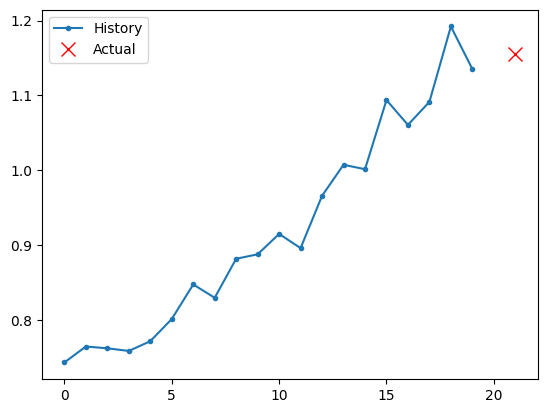

In [32]:
#Display examples
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num])

Prediction using average method

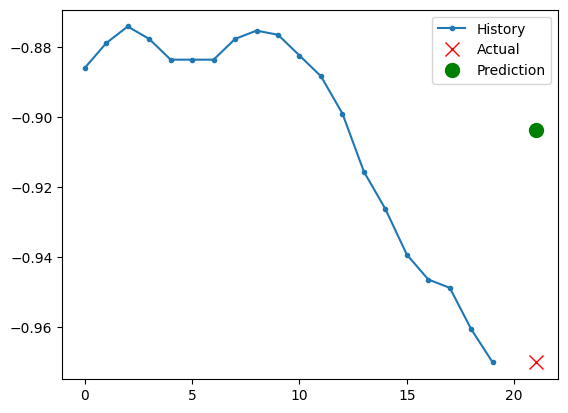

In [33]:
#Prediction is taken as average of all the points in sequence e.g.20
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num], train_x[exp_num].mean())

##Build Model

In [34]:
import tensorflow as tf

In [35]:
tf.random.set_seed(13)

In [36]:
#Build Model
model = tf.keras.Sequential()

#Add LSTM layer
model.add(tf.keras.layers.LSTM(8, input_shape=(train_x.shape[1],1,)))

#Add output layer
model.add(tf.keras.layers.Dense(1))

In [37]:
#Compile the model
model.compile(optimizer='adam', loss='mae')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


Train the model

- Convert batch to be 3 dimensional data : Batch size x Sequence length x 1

In [39]:
train_x.shape

(336420, 20)

In [40]:
train_x = np.expand_dims(train_x,axis=2)
test_x = np.expand_dims(test_x,axis=2)


In [41]:
train_x.shape

(336420, 20, 1)

In [42]:
train_y.shape

(336420,)

In [43]:
model.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=10,
          batch_size=256)

Epoch 1/10
1315/1315 [==============================] - 21s 9ms/step - loss: 0.0759 - val_loss: 0.0229
Epoch 2/10
1315/1315 [==============================] - 11s 8ms/step - loss: 0.0192 - val_loss: 0.0188
Epoch 3/10
1315/1315 [==============================] - 11s 8ms/step - loss: 0.0163 - val_loss: 0.0166
Epoch 4/10
1315/1315 [==============================] - 11s 9ms/step - loss: 0.0154 - val_loss: 0.0155
Epoch 5/10
1315/1315 [==============================] - 8s 6ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 6/10
1315/1315 [==============================] - 7s 5ms/step - loss: 0.0152 - val_loss: 0.0155
Epoch 7/10
1315/1315 [==============================] - 8s 6ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 8/10
1315/1315 [==============================] - 7s 5ms/step - loss: 0.0151 - val_loss: 0.0157
Epoch 9/10
1315/1315 [==============================] - 7s 5ms/step - loss: 0.0152 - val_loss: 0.0156
Epoch 10/10
1315/1315 [==============================] - 7s 6ms/step - loss: 0

In [44]:
#Model Prediction
a = model.predict(test_x[0:1])
a * std + mean

1/1 [==============================] - 1s 524ms/step


array([[14.307175]], dtype=float32)

VIsualize model prediction

1/1 [==============================] - 0s 21ms/step


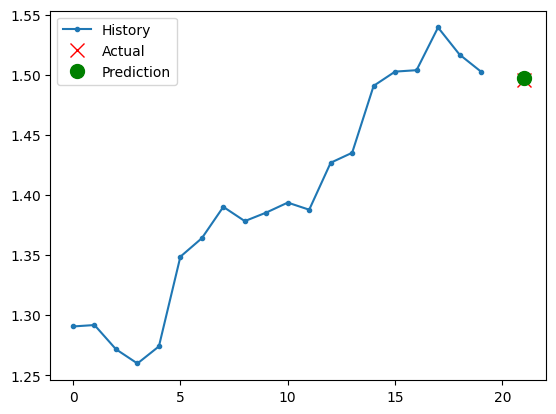

In [45]:
#Pick a test example
exp_num = np.random.randint(0, test_x.shape[0])

#Make input example a batch of 1
prediction = model.predict(np.expand_dims(test_x[exp_num], axis=0))

#Visualize
show_example(test_x[exp_num], test_y[exp_num], prediction[0])

##Multiple Time Series- Data Preparation

In [46]:
#Air temperature, pressure and air density
features_to_include = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']

#Get data
multi_df = df[features_to_include]
multi_df.index = df['Date Time']

In [47]:
#Train and Test Data
train_df = multi_df.iloc[:num_training_examples,:]
test_df = multi_df.iloc[num_training_examples:,:]

In [48]:
train_df.shape

(336440, 3)

Normalize data


In [49]:
#Find mean and standard deviation
mean_multi = train_df.mean()
std_multi = train_df.std()

In [50]:
mean_multi

T (degC)           8.987613
p (mbar)         988.832741
rho (g/m**3)    1217.704598
dtype: float64

In [51]:
std_multi

T (degC)         8.440685
p (mbar)         8.349543
rho (g/m**3)    40.129560
dtype: float64

In [52]:
#Normalize train and test data
norm_train_df = (train_df - mean_multi)/std_multi
norm_test_df = (test_df - mean_multi)/std_multi

In [53]:
norm_train_df.sample(n=5)

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
18.09.2010 19:20:00,0.148375,0.181718,-0.103530
11.03.2011 02:40:00,-0.199938,-0.419513,0.078880
31.10.2009 10:00:00,-1.139435,1.636887,1.518965
25.06.2011 15:30:00,0.599760,0.973378,-0.335528
27.11.2012 18:10:00,-0.115822,-1.068650,-0.194485


Prepare X and Y

In [54]:
def prepare_xy_multi(dataset, num_time_series=3, window_size=[20,15,10], target_series=0):

    dataX, dataY = [], []

    act_data = []

    for i in range(num_time_series):
        dataX.append([]) #Initialize an empty list for each time series
        act_data.append(dataset.iloc[:,i].to_list())

    #Get max window size
    max_window_size = max(window_size)

    for i in range(len(dataset)-max_window_size):

        #Prepare input for each time series
        for j in range(num_time_series):

            #Prepare input features
            input_features = act_data[j][(i+max_window_size-window_size[j]):(i+max_window_size)]
            dataX[j].append(input_features)

        #Prepare Label
        label = act_data[target_series][i + max_window_size]
        dataY.append(label)

    return dataX, dataY

In [55]:
#Prepare Training and Test X, y
train_x_multi, train_y_multi = prepare_xy_multi(norm_train_df)
test_x_multi, test_y_multi = prepare_xy_multi(norm_test_df)

In [56]:
len(train_x_multi)

3

#### Build Model II

In [57]:
#Build 3 input layers - one for each time series
input_1 = tf.keras.layers.Input(shape=(len(train_x_multi[0][0]), 1,))
input_2 = tf.keras.layers.Input(shape=(len(train_x_multi[1][0]), 1,))
input_3 = tf.keras.layers.Input(shape=(len(train_x_multi[2][0]), 1,))

In [58]:
#Build 3 LSTM Layers - One for each time series
lstm_1 = tf.keras.layers.LSTM(8)(input_1)
lstm_2 = tf.keras.layers.LSTM(8)(input_2)
lstm_3 = tf.keras.layers.LSTM(8)(input_3)

In [59]:
#Concatenate LSTM layers output
cat = tf.keras.layers.concatenate([lstm_1, lstm_2, lstm_3])

In [60]:
cat

<KerasTensor: shape=(None, 24) dtype=float32 (created by layer 'concatenate')>

In [61]:
#Output Layer
op = tf.keras.layers.Dense(1)(cat)

In [62]:
#Build Non-Sequential Model
model_multi = tf.keras.Model([input_1, input_2, input_3], #3 Inputs
                             op) #Output

In [63]:
#compile model
model_multi.compile(optimizer='adam', loss='mae')

##### Model Training

In [64]:
model_multi.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 15, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 8)            320         ['input_1[0][0]']                
                                                                                              

We need to feed 3 inputs. Each input will be 3 dimensional

In [65]:
#Build data for training
train_x_multi_1 = np.reshape(np.array(train_x_multi[0]), (len(train_x_multi[0]),len(train_x_multi[0][1]),1 ))
train_x_multi_2 = np.reshape(np.array(train_x_multi[1]), (len(train_x_multi[1]),len(train_x_multi[1][1]),1 ))
train_x_multi_3 = np.reshape(np.array(train_x_multi[2]), (len(train_x_multi[2]),len(train_x_multi[2][1]),1 ))

In [66]:
train_x_multi_1.shape

(336420, 20, 1)

In [67]:
#Build data for test
test_x_multi_1 = np.reshape(np.array(test_x_multi[0]), (len(test_x_multi[0]),len(test_x_multi[0][1]),1 ))
test_x_multi_2 = np.reshape(np.array(test_x_multi[1]), (len(test_x_multi[1]),len(test_x_multi[1][1]),1 ))
test_x_multi_3 = np.reshape(np.array(test_x_multi[2]), (len(test_x_multi[2]),len(test_x_multi[2][1]),1 ))

In [68]:
#Model training
model_multi.fit([train_x_multi_1, train_x_multi_2, train_x_multi_3], np.array(train_y_multi),
                validation_data=([test_x_multi_1, test_x_multi_2, test_x_multi_3], np.array(test_y_multi)),
                epochs=10,
                batch_size=256)

Epoch 1/10
1315/1315 [==============================] - 20s 11ms/step - loss: 0.0767 - val_loss: 0.0241
Epoch 2/10
1315/1315 [==============================] - 12s 9ms/step - loss: 0.0206 - val_loss: 0.0192
Epoch 3/10
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0182 - val_loss: 0.0178
Epoch 4/10
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 5/10
1315/1315 [==============================] - 12s 9ms/step - loss: 0.0166 - val_loss: 0.0172
Epoch 6/10
1315/1315 [==============================] - 12s 9ms/step - loss: 0.0163 - val_loss: 0.0171
Epoch 7/10
1315/1315 [==============================] - 12s 9ms/step - loss: 0.0162 - val_loss: 0.0176
Epoch 8/10
1315/1315 [==============================] - 11s 9ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 9/10
1315/1315 [==============================] - 11s 9ms/step - loss: 0.0159 - val_loss: 0.0170
Epoch 10/10
1315/1315 [==============================] - 12s 9ms/step 

Visualize Model Prediction

1/1 [==============================] - 1s 1s/step


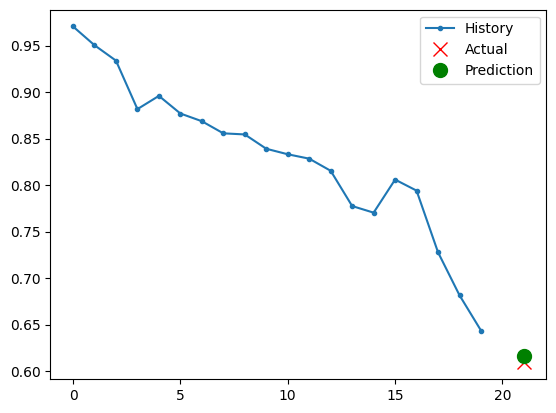

In [69]:
#Pick a test example
exp_num = np.random.randint(0, len(test_y_multi))

#Prepare 3 batch inputs - each 3 dimensional
in_1 = np.expand_dims(np.array(test_x_multi[0][exp_num]), axis=0)
in_2 = np.expand_dims(np.array(test_x_multi[1][exp_num]), axis=0)
in_3 = np.expand_dims(np.array(test_x_multi[2][exp_num]), axis=0)

#Make prediction
prediction = model_multi.predict([in_1, in_2, in_3])

#Visualize
show_example(in_1[0], test_y_multi[exp_num], prediction[0])